* [PEP 465 -- A dedicated infix operator for matrix multiplication](https://www.python.org/dev/peps/pep-0465/)

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context="notebook", style="darkgrid", palette="dark")

In [146]:
alpha = 0.01
theta = np.matrix(np.zeros(2))

In [60]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
data.insert(loc=0, column='Ones', value=1) # x0 = 1, intercetpion dummy feature

data.head()

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


# compute cost
> take a look at the cost function in ex1.pdf, translate it into numpy computation

In [64]:
def compute_cost(X, y, theta):
    """
    X: R(m*n) matrix, m records, n features
    y: R(m) vector
    theta : R(n) vector, linear regression parameters
    """
    inner = np.sum(np.power(X @ theta.transpose() - y.transpose(), 2)) # @ for matrix product in python 3.5
    return  inner / (2 * (len(X)))

In [65]:
X = np.matrix(data.iloc[:, :2]) # all rows, take only column 0, 1
y = np.matrix(data['profit'])

In [93]:
compute_cost(X, y, theta)

32.072733877455676

# batch gradient decent
1. couldn't stop thinking in Matrix operation, will see if this tendency gives me something
2. look at the gradient batch gradient decent definition in the pdf

In [187]:
def batch_update(X, y, theta, alpha):
    """ return whole batch updated parameters
    n*m @ (m*1 - (m*n @ n*1)) -> n*1
    where n = n features
    """
    inner = X.transpose() @ ((X @ theta.transpose() - y.transpose())) # R(n*1) matrix
    
    new_theta = theta.transpose() - (alpha/len(X)) * inner # don't forget the alpha/m, this is n*1
    
    return new_theta.transpose() # return theta vector R(1*n)

In [188]:
def batch_gradient_decent(X, y, theta, alpha, epoch):
    """ return the parameter and cost per batch
    epoch: how many pass to run through whole batch
    """
    cost = [compute_cost(X, y, theta)]
    
    for i in range(epoch):
        theta = batch_update(X, y, theta, alpha)
        cost.append(compute_cost(X, y, theta))
    
    return theta, cost

In [189]:
theta = np.matrix(np.zeros(2))
epoch = 1000
theta, cost = batch_gradient_decent(X, y, theta, alpha, epoch)

# visualize them

In [193]:
# compute final cost
compute_cost(X, y, theta)

4.5159555030789127

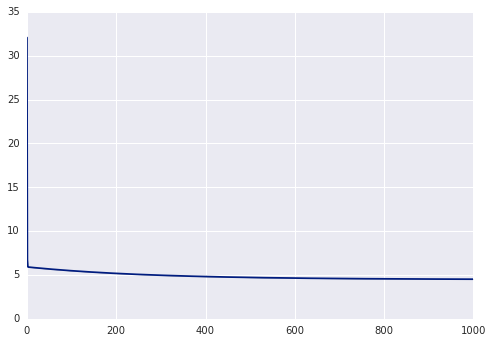

In [194]:
sns.tsplot(time=np.arange(len(cost)), data = cost)

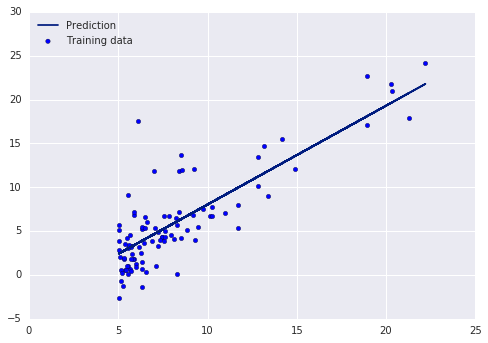

In [210]:
b = theta.tolist()[0][0] # intercept
m = theta.tolist()[0][1] # slope

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, label="Prediction")
plt.legend(loc=2)